Shape: (1, 306)
Total Boston Population: 716,313


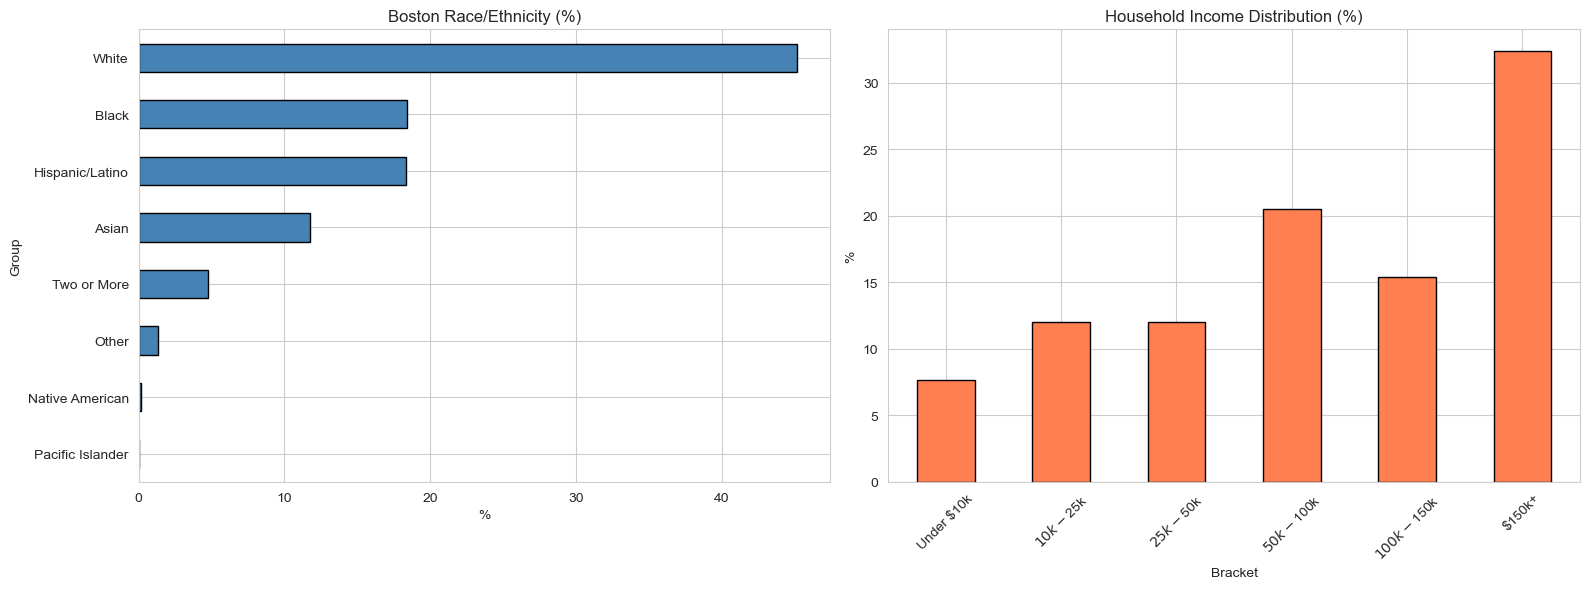

Race/Ethnicity
  White: 45.18%
  Black: 18.43%
  Asian: 11.75%
  Hispanic/Latino: 18.32%
  Native American: 0.14% ⚠️ UNDERREPRESENTED
  Pacific Islander: 0.04% ⚠️ UNDERREPRESENTED
  Other: 1.35% ⚠️ UNDERREPRESENTED
  Two or More: 4.79%

 Income
  Under $10k: 7.65%
  $10k-$25k: 12.01%
  $25k-$50k: 12.05%
  $50k-$100k: 20.51%
  $100k-$150k: 15.42%
  $150k+: 32.37%

⚠️ Low-income households (<$25k): 19.7%


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

pop = pd.read_csv('Boston Population Estimates 2025 City Level.csv', low_memory=False)
print(f'Shape: {pop.shape}')
row = pop.iloc[0]
total_pop = float(row['population_b01001_001e'])
print(f'Total Boston Population: {total_pop:,.0f}')

#  Race/Ethnicity 
race = pd.DataFrame({
    'Group': ['White', 'Black', 'Asian', 'Hispanic/Latino', 'Native American', 
              'Pacific Islander', 'Other', 'Two or More'],
    'Population': [
        float(row['population_b03002_003e']), float(row['population_b03002_004e']),
        float(row['population_b03002_006e']), float(row['population_b03002_012e']),
        float(row['population_b03002_005e']), float(row['population_b03002_007e']),
        float(row['population_b03002_008e']), float(row['population_b03002_009e']),
    ]
})
race['Percentage'] = (race['Population'] / total_pop * 100).round(2)

#  Income 
income = pd.DataFrame({
    'Bracket': ['Under $10k', '$10k-$25k', '$25k-$50k', '$50k-$100k', '$100k-$150k', '$150k+'],
    'Households': [
        float(row['income_b19037_lt10k']),
        sum(float(row[c]) for c in ['income_b19037_10k_to_14999','income_b19037_15k_to_19999','income_b19037_20k_to_24999']),
        sum(float(row[c]) for c in ['income_b19037_25k_to_29999','income_b19037_30k_to_34999','income_b19037_35k_to_39999','income_b19037_40k_to_44999','income_b19037_45k_to_49999']),
        sum(float(row[c]) for c in ['income_b19037_50k_to_59999','income_b19037_60k_to_74999','income_b19037_75k_to_99999']),
        sum(float(row[c]) for c in ['income_b19037_100k_to_124999','income_b19037_125k_to_149999']),
        sum(float(row[c]) for c in ['income_b19037_150k_to_199999','income_b19037_200k_plus']),
    ]
})
total_hh = float(row['income_b19037_001e'])
income['Percentage'] = (income['Households'] / total_hh * 100).round(2)

#  Visualize 
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

race.set_index('Group')['Percentage'].sort_values(ascending=True).plot(
    kind='barh', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Boston Race/Ethnicity (%)')
axes[0].set_xlabel('%')

income.set_index('Bracket')['Percentage'].plot(
    kind='bar', ax=axes[1], color='coral', edgecolor='black')
axes[1].set_title('Household Income Distribution (%)')
axes[1].set_ylabel('%')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#  Flag bias risks 
print('Race/Ethnicity')
for _, r in race.iterrows():
    flag = ' ⚠️ UNDERREPRESENTED' if r['Percentage'] < 2 else ''
    print(f'  {r["Group"]}: {r["Percentage"]}%{flag}')

print('\n Income')
for _, r in income.iterrows():
    print(f'  {r["Bracket"]}: {r["Percentage"]}%')
low_income = income[income['Bracket'].isin(['Under $10k', '$10k-$25k'])]['Percentage'].sum()
print(f'\n⚠️ Low-income households (<$25k): {low_income:.1f}%')

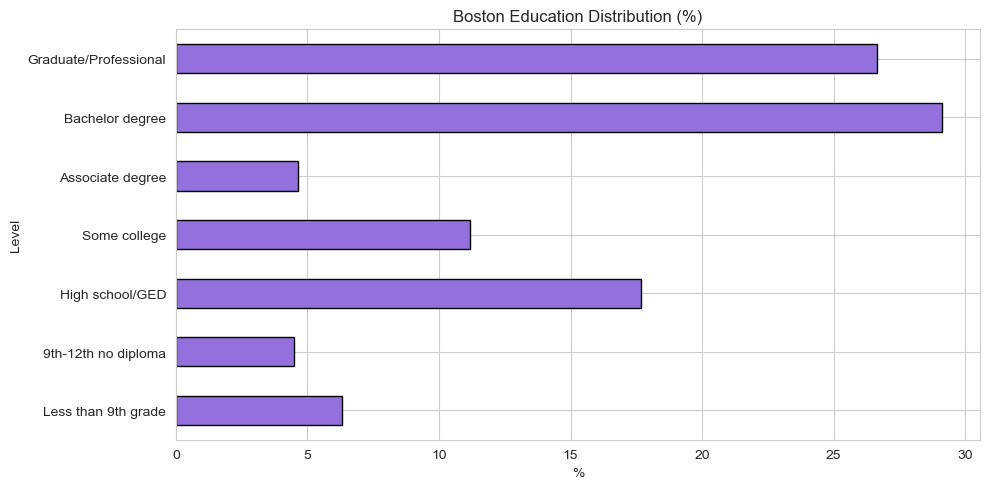

Education
  Less than 9th grade: 6.3%
  9th-12th no diploma: 4.49%
  High school/GED: 17.66%
  Some college: 11.16%
  Associate degree: 4.64%
  Bachelor degree: 29.1%
  Graduate/Professional: 26.63%

⚠️ No high school diploma: 10.8% — may face digital literacy barriers using Boston Pulse
POPULATION BIAS IMPLICATIONS FOR BOSTON PULSE

This dataset is a REFERENCE — not modeled directly.
It validates whether other datasets fairly represent Boston.

KEY RISKS:
1. Native American (0.14%) & Pacific Islander (0.04%)
   → Models will have near-zero signal for these groups
   → Mitigation: Flag predictions for these groups as low-confidence

2. Low-income households (<$25k): 19.7%
   → 1 in 5 households — civic services must reach them equitably
   → Mitigation: Cross-check BERDO/Street Sweeping coverage vs income areas

3. No diploma: 10.8%  
   → Boston Pulse's chat interface must be accessible to all literacy levels
   → Mitigation: Simple language, visual-first UI design

MITIGATION STRATEG

In [15]:
#  Education level 
edu = pd.DataFrame({
    'Level': ['Less than 9th grade', '9th-12th no diploma', 'High school/GED',
              'Some college', 'Associate degree', 'Bachelor degree', 'Graduate/Professional'],
    'Population': [
        float(row['education_b15003_lt9th']),
        float(row['education_b15003_9th_to_12thnodiploma']),
        float(row['education_b15003_hsgrad_and_ged']),
        float(row['education_b15003_somecollegenodegree']),
        float(row['education_b15003_021e']),
        float(row['education_b15003_022e']),
        float(row['education_b15003_gradprofdegree']),
    ]
})
total_edu = float(row['education_b15003_001e'])
edu['Percentage'] = (edu['Population'] / total_edu * 100).round(2)

fig, ax = plt.subplots(figsize=(10, 5))
edu.set_index('Level')['Percentage'].plot(kind='barh', ax=ax, color='mediumpurple', edgecolor='black')
ax.set_title('Boston Education Distribution (%)')
ax.set_xlabel('%')
plt.tight_layout()
plt.show()

print('Education')
for _, r in edu.iterrows():
    print(f'  {r["Level"]}: {r["Percentage"]}%')

no_diploma = edu[edu['Level'].isin(['Less than 9th grade', '9th-12th no diploma'])]['Percentage'].sum()
print(f'\n⚠️ No high school diploma: {no_diploma:.1f}% — may face digital literacy barriers using Boston Pulse')

#  Summary: Bias implications for Boston Pulse 
print('POPULATION BIAS IMPLICATIONS FOR BOSTON PULSE')
print(f'''
This dataset is a REFERENCE — not modeled directly.
It validates whether other datasets fairly represent Boston.

KEY RISKS:
1. Native American (0.14%) & Pacific Islander (0.04%)
   → Models will have near-zero signal for these groups
   → Mitigation: Flag predictions for these groups as low-confidence

2. Low-income households (<$25k): {low_income:.1f}%
   → 1 in 5 households — civic services must reach them equitably
   → Mitigation: Cross-check BERDO/Street Sweeping coverage vs income areas

3. No diploma: {no_diploma:.1f}%  
   → Boston Pulse's chat interface must be accessible to all literacy levels
   → Mitigation: Simple language, visual-first UI design

MITIGATION STRATEGY:
  • Cross-dataset alignment: Compare service coverage by neighborhood 
    against demographic composition
  • Equity-weighted scoring: Weight predictions by vulnerability index
  • Disaggregated reporting: Report model performance by neighborhood 
    (as proxy for demographics)
''')